<a href="https://colab.research.google.com/github/min207/2023-1-ESAA/blob/main/ESAA230526_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기본 분류: 의류 이미지 분류**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


## **- 패션 MNIST 데이터셋 임포트**
- 10개의 범주와 70000개의 흑백 이미지로 구성된 패션 MNIST 데이터셋 사용
  + 이미지 해상도가 낮고 개별 옷 품목을 나타냄 

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


- load_data() 함수를 호출하면 네 개의 넘파이 배열 반환
  + train_images, train_labels 배열: 모델 학습에 사용되는 훈련 세트
  + test_images, test_labels 비열: 모델 테스트에 사용되는 테스트 세트 

- 이미지는 28*28 크기의 넘파이 배열이며 픽셀 값은 0~255
- 레이블 값은 옷의 클래스를 나타냄
  + 0~9 차례로 t-shirt, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, ankle boot
  + 클래스 이름이 있지 않기 때문에 별도의 변수 생성 

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## **- 데이터 탐색**
- 훈련 세트는 60000개의 이미지와 레이블로, 0~9 값을 가짐
- 테스트 세트는 10000개의 이미지와 레이블을 가짐

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## **- 데이터 전처리**
- 0~255의 값을 0~1의 값으로 조정
  + 훈련과 테스트 세트를 동일한 방식으로 전처리 

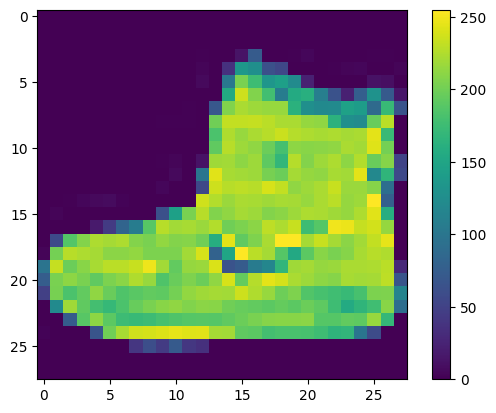

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

- 훈련 ㅔ트에서 처음 25개의 이미지와 클래스 이름을 출력 

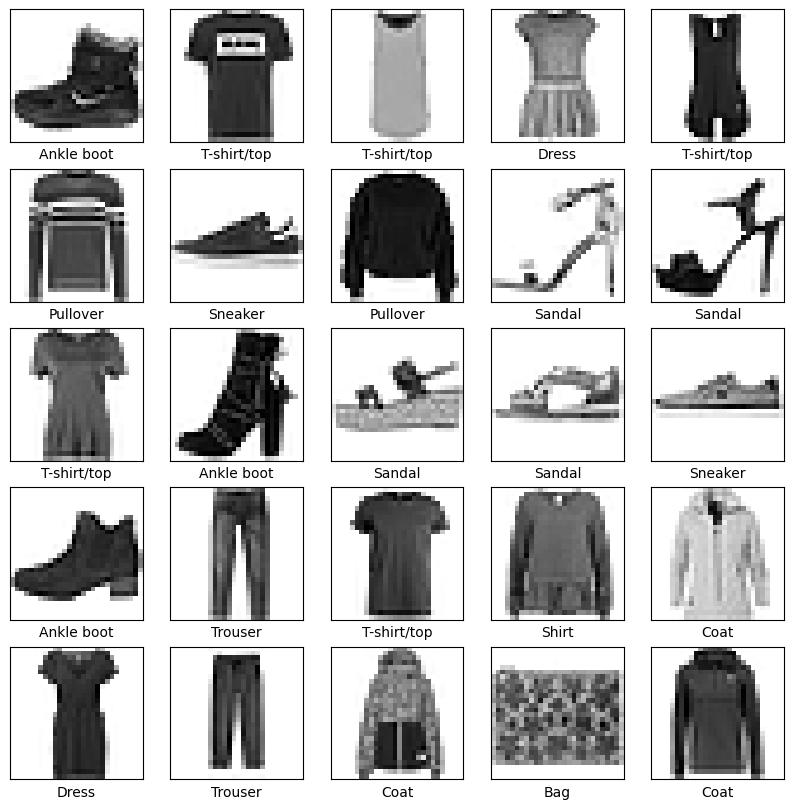

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## **- 모델 구성**

**- 층 설정**
  + 신경망의 기본 빌딩 블록은 레이어
  + 레이어는 공급된 데이터로부터 표현을 추출

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

- 첫 번째 층은 2차원 배열의 이미지 포멧을 1차원 배열로 변환
  + 픽셀의 행을 펼쳐서 일렬로 늘림
  + 학습되는 가중치가 없고 데이터 변환만 수행

- 이후 두 개의 층은 연속되어 연결됨: 완전 연결층 혹은 밀집 연결이라고 함
  + 첫번째 덴스 층은 128개의 노드를 가짐
  + 두번째 덴스 층은 10개의 노드의 소프트맥스 층
    - 이 층은 10개의 확률을 반환하고 반환된 값의 전체 합은 1
    - 각 노드는 현재 이미지가 10개 클래스 중 하나에 속할 확률을 의미 


**- 모델 컴파일**
  + 손실함수: 훈련 중 모델이 얼마나 정확한지 측정
    - 모델을 올바른 방향으로 조정하려면 이 함수를 최소화해야함
  + 옵티마이저: 모델이 인식하는 데이터와 해당 손실 함수를 기반으로 모델이 업데이트 되는 방식
  + 메트릭: 훈련 및 테스트 단계를 모니터링하는 데에 사용
    - 예제에서는 정확도 사용 

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **- 모델 훈련**
1. 훈련 데이터를 모델에 주입
2. 모델이 이미지와 레이블 매핑 방법 학습
3. 테스트 세트에 대한 모델 예측 생성
4. 예측이 레이블과 일치하는지 확인 


**- 모델 피트**
  + model.fit 메서드를 통해 훈련 수행 
  + 모델이 훈련되면서 손실과 정확도 지표 출력

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4981 - accuracy: 0.8255
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3773 - accuracy: 0.8637
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3385 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3168 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2963 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2837 - accuracy: 0.8948
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2705 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2598 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2513 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

**- 정확도 평가**
  + 모델이 테스트 데이터 세트에서 작동하는 방식 비표
    - 테스트 세트의 정확도가 조금 더 낮음
    - 과대적합이 원인 

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3319 - accuracy: 0.8858 - 637ms/epoch - 2ms/step

Test accuracy: 0.8858000040054321


**- 예측하기**
  + 훈련된 모델을 사용하여 일부 이미지에 대한 예측 수행
  + 소프트맥스 레이어를 연결하여 로짓을 해석하기 쉬운 확률로 변환 

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


- 첫 번째 예측 확인 

In [18]:
predictions[0]

array([1.5953155e-08, 5.0986912e-09, 5.1287228e-09, 9.2227148e-13,
       1.4113454e-08, 2.1520441e-03, 4.3005549e-08, 6.3513011e-02,
       9.7814015e-09, 9.3433481e-01], dtype=float32)

- 가장 높은 신뢰도를 가진 레이블 추출 

In [19]:
np.argmax(predictions[0])

9

- 예측값이 맞는지 실제 레이블 값 출력 

In [20]:
test_labels[0]

9

- 10개 클래스에 대한 예측 그래프로 시각화 

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**- 예측 확인**
  + 훈련된 모델을 사용하여 일부 이미지에 대한 예측 수행

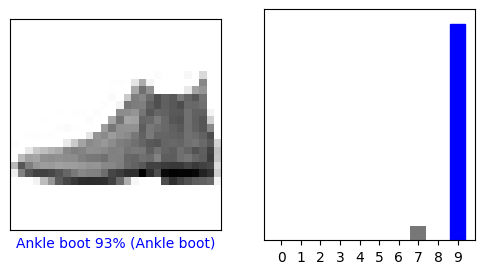

In [22]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

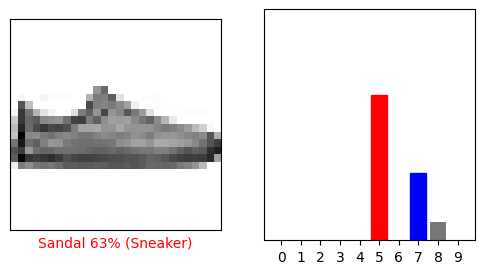

In [23]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

- 여러 개의 이미지의 예측 출력
  + 올바르게 예측된 레이블은 파란색, 잘못 예측된 레이블은 빨간색

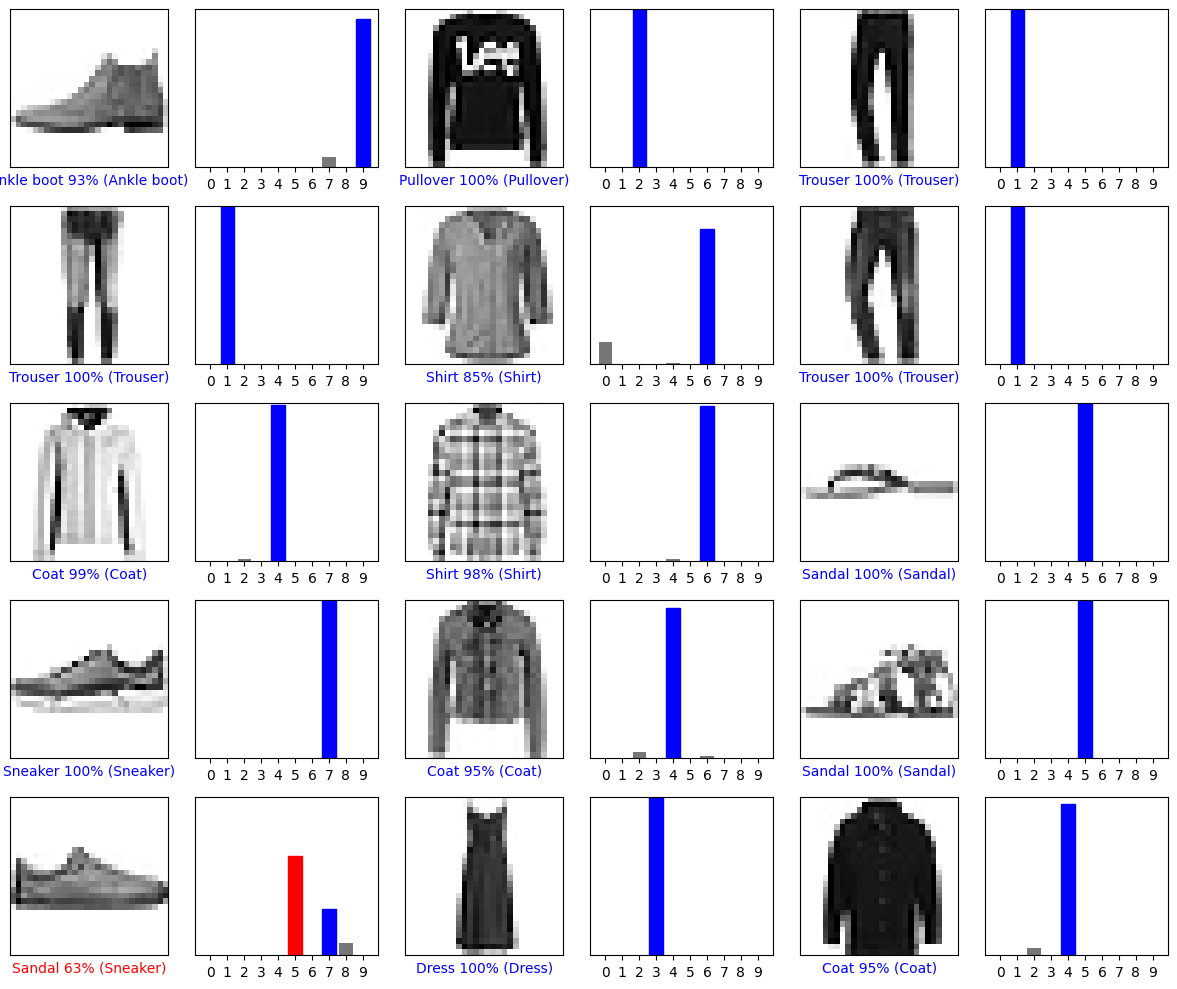

In [24]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## **- 훈련된 모델 사용**
- 훈련된 모델을 사용하여 한 이미지에 대한 예측 생성 

In [25]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


- tf.keras 모델은 한 번에 샘플의 묶음 또는 배치로 예측을 만드는 것에 최적화 됨
- 하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함 

In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


- 예측 이미지 생성 

In [27]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 25ms/step
[[5.0664297e-05 7.7610065e-14 9.9895453e-01 1.6071914e-08 8.3509681e-04
  2.5525257e-15 1.5966489e-04 4.2246166e-15 4.5250848e-09 1.0065452e-12]]


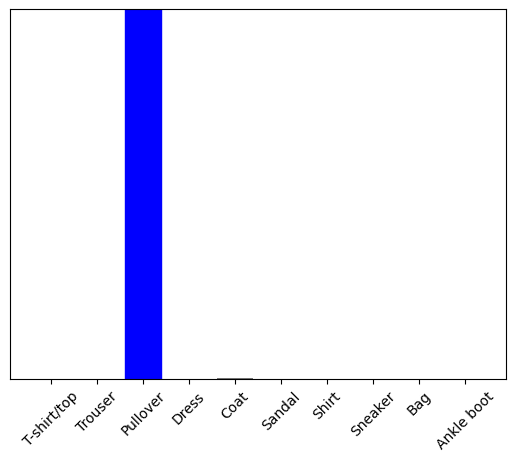

In [28]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

- tf.keras.Model.predict는 데이터 배치의 각 이미지에 대해 하나의 목록씩 목록의 목록을 반환 

In [29]:
np.argmax(predictions_single[0])

2